In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd 

1071
/Users/haidiazaman/Desktop/FYP/y3s2/unrel-dataset/images/1196.jpg


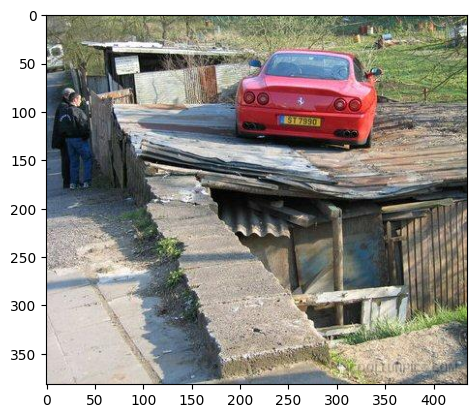

In [198]:
root_folder="/Users/haidiazaman/Desktop/FYP/y3s2/unrel-dataset/images"
images_list = os.listdir(root_folder)
images_list.sort(key=lambda x: int(x.split(".")[0]))
print(len(images_list))

i=-1
image_file = root_folder+"/"+images_list[i]
print(image_file)
image_array = plt.imread(image_file)
plt.imshow(image_array)
plt.show()

In [216]:
import scipy.io
from pprint import pprint

annotations2="/Users/haidiazaman/Desktop/FYP/y3s2/unrel-dataset/annotations.mat"
mat2=scipy.io.loadmat(annotations2)
data=mat2["annotations"]
print(len(data))

lst1,lst2,lst3,lst4,lst5,lst6,lst7,lst8=[],[],[],[],[],[],[],[]
for row in data:
    file_name = row[0][0][0][0][0]
    img_id = row[0][0][0][1][0][0]
    relationships = row[0][0][0][2][0]
    subject = relationships[0][0][0][0][0]
    object = relationships[0][0][0][1][0]
    subject_box = relationships[0][0][0][2][0]
    object_box = relationships[0][0][0][3][0]
    relationship = relationships[0][0][0][4][0][0][0]
    
    lst1.append(file_name)
    lst2.append(img_id)    
#     lst3.append(relationships)    
    lst4.append(subject)    
    lst5.append(object)    
    lst6.append(subject_box)    
    lst7.append(object_box)        
    lst8.append(relationship)
    
dict_ = {
    "file_name" :lst1,
    "img_id" :lst2,
#     "relationships" :lst3,
    "subject" :lst4,
    "object" :lst5,
    "subject_box" :lst6,
    "object_box" :lst7,
    "relationship" :lst8
}


image_labels=pd.DataFrame(dict_)
#change array to list to so that output arrays in subject_box and object_box column doesnt lose the commas
image_labels["subject_box"]=image_labels["subject_box"].apply(lambda x: list(x))
image_labels["object_box"]=image_labels["object_box"].apply(lambda x: list(x))
image_labels.to_csv("unrel_images_labels.csv",index=False)
image_labels.head()
image_labels.tail()

1071


,file_name,img_id,subject,object,subject_box,object_box,relationship
1066,1186.jpg,1186,car,road,"[79, 144, 539, 329]","[1, 306, 600, 450]",above
1067,1189.jpg,1189,elephant,tree,"[119, 25, 291, 189]","[2, 1, 379, 477]",in
1068,1194.jpg,1194,car,building,"[105, 112, 281, 298]","[1, 1, 334, 383]",in
1069,1195.jpg,1195,car,building,"[226, 158, 457, 344]","[1, 1, 504, 335]",in
1070,1196.jpg,1196,car,roof,"[194, 38, 342, 138]","[66, 91, 435, 192]",on the top of


In [217]:
pd.read_csv("unrel_images_labels.csv")

,file_name,img_id,subject,object,subject_box,object_box,relationship
0,1.jpg,1,bike,person,"[716, 111, 1197, 457]","[760, 342, 1042, 1037]",above
1,2.jpg,2,bike,person,"[383, 355, 803, 710]","[610, 534, 888, 1000]",above
2,3.jpg,3,bike,person,"[1, 1, 671, 612]","[231, 118, 528, 960]",above
3,4.jpg,4,bike,person,"[205, 79, 369, 189]","[229, 131, 318, 276]",above
4,5.jpg,5,bike,person,"[285, 46, 589, 231]","[352, 138, 523, 498]",above
...,...,...,...,...,...,...,...
1066,1186.jpg,1186,car,road,"[79, 144, 539, 329]","[1, 306, 600, 450]",above
1067,1189.jpg,1189,elephant,tree,"[119, 25, 291, 189]","[2, 1, 379, 477]",in
1068,1194.jpg,1194,car,building,"[105, 112, 281, 298]","[1, 1, 334, 383]",in
1069,1195.jpg,1195,car,building,"[226, 158, 457, 344]","[1, 1, 504, 335]",in


# draft work - ignore this section

In [38]:
import scipy.io

annotations1="/Users/haidiazaman/Desktop/FYP/y3s2/unrel-dataset/annotated_triplets.mat"
mat1=scipy.io.loadmat(annotations1)
print(len(mat1["triplets"]))
pprint(mat1)

76
{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue May '
               b' 2 20:38:32 2017',
 '__version__': '1.0',
 'triplets': array([[array(['bike-above-person'], dtype='<U17')],
       [array(['building-has-wheel'], dtype='<U18')],
       [array(['car-above-road'], dtype='<U14')],
       [array(['car-in-building'], dtype='<U15')],
       [array(['car-in-tree'], dtype='<U11')],
       [array(['car-on the top of-bus'], dtype='<U21')],
       [array(['car-on the top of-car'], dtype='<U21')],
       [array(['car-on the top of-roof'], dtype='<U22')],
       [array(['car-under-elephant'], dtype='<U18')],
       [array(['cat-on the top of-dog'], dtype='<U21')],
       [array(['cat-on the top of-person'], dtype='<U24')],
       [array(['cat-ride-skateboard'], dtype='<U19')],
       [array(['cat-wear-tie'], dtype='<U12')],
       [array(['chair-taller than-person'], dtype='<U24')],
       [array(['cone-on the top of-horse'], dtype='<U24')],
     

In [41]:
import scipy.io
from pprint import pprint

annotations2="/Users/haidiazaman/Desktop/FYP/y3s2/unrel-dataset/annotations.mat"
mat2=scipy.io.loadmat(annotations2)
print(len(mat2["annotations"]))
pprint(mat2)

1071
{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Jul '
               b'16 18:27:27 2017',
 '__version__': '1.0',
 'annotations': array([[array([[(array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
                              dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
                      dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
                              dtype=[('category', 'O'), ('box', 'O')])                                              ]

In [45]:
for array in mat2["annotations"]:
    print(array)
    break

[array([[(array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
                       dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
               dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
                       dtype=[('category', 'O'), ('box', 'O')])                                              ],
                [array([[(array(['bike'], dtype='<U4'), array([[ 716,  111, 1197,  457]], dtype=uint16))]],
                       dtype=[('category', 'O'), ('box', 'O')])                                  

In [47]:
for arr in array:
    print(arr)


[[(array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
                dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
        dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
                dtype=[('category', 'O'), ('box', 'O')])                                              ],
         [array([[(array(['bike'], dtype='<U4'), array([[ 716,  111, 1197,  457]], dtype=uint16))]],
                dtype=[('category', 'O'), ('box', 'O')])                                            ]],
        dtype=object))      

In [70]:
mat2["annotations"][0]

array([array([[(array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
                             dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
                     dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
                             dtype=[('category', 'O'), ('box', 'O')])                                              ],
                      [array([[(array(['bike'], dtype='<U4'), array([[ 716,  111, 1197,  457]], dtype=uint16))]],
                             dtype=[('category', 'O'), ('box', 'O')

In [73]:
np.concatenate(mat2["annotations"][0]).ravel().shape

(1,)

In [60]:
mat2["annotations"][0]

array([array([[(array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
                             dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
                     dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
                             dtype=[('category', 'O'), ('box', 'O')])                                              ],
                      [array([[(array(['bike'], dtype='<U4'), array([[ 716,  111, 1197,  457]], dtype=uint16))]],
                             dtype=[('category', 'O'), ('box', 'O')

In [57]:
mat2["annotations"][0][0]

array([[(array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
                      dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
              dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
                      dtype=[('category', 'O'), ('box', 'O')])                                              ],
               [array([[(array(['bike'], dtype='<U4'), array([[ 716,  111, 1197,  457]], dtype=uint16))]],
                      dtype=[('category', 'O'), ('box', 'O')])                                        

In [62]:
mat2["annotations"][0][0][0]

array([(array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
                     dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
             dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
                     dtype=[('category', 'O'), ('box', 'O')])                                              ],
              [array([[(array(['bike'], dtype='<U4'), array([[ 716,  111, 1197,  457]], dtype=uint16))]],
                     dtype=[('category', 'O'), ('box', 'O')])                                            ]]

In [68]:
mat2["annotations"][0][0][0].shape

array([(array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
                     dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
             dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
                     dtype=[('category', 'O'), ('box', 'O')])                                              ],
              [array([[(array(['bike'], dtype='<U4'), array([[ 716,  111, 1197,  457]], dtype=uint16))]],
                     dtype=[('category', 'O'), ('box', 'O')])                                            ]]

In [59]:
mat2["annotations"][0][0][1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
% Load the annotations data from the file
load('annotations.mat');

% Initialize empty arrays for each column
filename = cell(size(annotations));
im_id = zeros(size(annotations));
subject = cell(size(annotations));
object = cell(size(annotations));
subject_box = cell(size(annotations));
object_box = cell(size(annotations));
object_category_1 = cell(size(annotations));
object_category_1_box = cell(size(annotations));
object_category_2 = cell(size(annotations));
object_category_2_box = cell(size(annotations));

objects = cell(size(annotations));

% Iterate over each annotation and extract the data for each column
for i = 1:length(annotations)
    filename{i} = annotations{i}.filename;
    im_id(i) = annotations{i}.im_id;
    subject(i) = annotations{i}.relationships{1}.sub;
    object(i) = annotations{i}.relationships{1}.obj;
    subject_box(i) = annotations{i}.relationships{1}.sub_box;
    object_box(i) = annotations{i}.relationships{1}.obj_box;
    relationship(i) = annotations{i}.relationships{1}.rels;
    object_category_1(i) = annotations{i}.objects{1}.category;
    object_category_1_box(i) = annotations{i}.objects{1}.box;
    object_category_2(i) = annotations{i}.objects{2}.category;
    object_category_2_box(i) = annotations{i}.objects{2}.box;
end

% Combine the columns into a table
T = table(filename, im_id, subject, object,subject_box,object_box,relationship,object_category_1,object_category_1_box,object_category_2,object_category_2_box);

% Display the table
disp(T);


In [ ]:
% Load the annotations data from the file
load('annotations.mat');

% Initialize empty arrays for each column
filename = cell(size(annotations));
im_id = zeros(size(annotations));
subject = cell(size(annotations));
object = cell(size(annotations));
subject_box = cell(size(annotations));
object_box = cell(size(annotations));
object_category_1 = cell(size(annotations));
object_category_1_box = cell(size(annotations));
object_category_2 = cell(size(annotations));
object_category_2_box = cell(size(annotations));


% Iterate over each annotation and extract the data for each column
for i = 1:length(annotations)
    filename{i} = annotations{i}.filename;
    im_id(i) = annotations{i}.im_id;
    subject(i) = annotations{i}.relationships{1}.sub;
    object(i) = annotations{i}.relationships{1}.obj;
    subject_box(i) = annotations{i}.relationships{1}.sub_box;
    object_box(i) = annotations{i}.relationships{1}.obj_box;
    relationship(i) = annotations{i}.relationships{1}.rels;
    object_category_1(i) = annotations{i}.objects{1}.category;
    object_category_1_box(i) = annotations{i}.objects{1}.box;
    object_category_2(i) = annotations{i}.objects{2}.category;
    object_category_2_box(i) = annotations{i}.objects{2}.box;
end

% Combine the columns into a table
T = table(filename, im_id, subject, object,subject_box,object_box,relationship,object_category_1,object_category_1_box,object_category_2,object_category_2_box);

% Display the table
disp(T);


In [ ]:
% Load the annotations data from the file
load('annotations.mat');

% Initialize empty arrays for each column
filename = cell(size(annotations));
im_id = zeros(size(annotations));
subject = cell(size(annotations));
object = cell(size(annotations));

% Iterate over each annotation and extract the data for each column
for i = 1:length(annotations)
    filename{i} = annotations{i}.filename;
    im_id(i) = annotations{i}.im_id;
    subject(i) = annotations{i}.relationships{1}.sub;
    object(i) = annotations{i}.relationships{1}.obj;
    
% Combine the columns into a table
T = table(filename, im_id, subject, object)

% Display the table
disp(T);

In [74]:
import scipy.io
from pprint import pprint

annotations2="/Users/haidiazaman/Desktop/FYP/y3s2/unrel-dataset/annotations.mat"
mat2=scipy.io.loadmat(annotations2)

In [76]:
mat2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations'])

In [83]:
data=np.concatenate(mat2["annotations"])
pd.DataFrame(data)

,0
0,"[[[['1.jpg'], [[1]], [[array([[(array(['bike']..."
1,"[[[['2.jpg'], [[2]], [[array([[(array(['bike']..."
2,"[[[['3.jpg'], [[3]], [[array([[(array(['bike']..."
3,"[[[['4.jpg'], [[4]], [[array([[(array(['bike']..."
4,"[[[['5.jpg'], [[5]], [[array([[(array(['bike']..."
...,...
1066,"[[[['1186.jpg'], [[1186]], [[array([[(array(['..."
1067,"[[[['1189.jpg'], [[1189]], [[array([[(array(['..."
1068,"[[[['1194.jpg'], [[1194]], [[array([[(array(['..."
1069,"[[[['1195.jpg'], [[1195]], [[array([[(array(['..."


In [84]:
data=mat2["annotations"]
pd.DataFrame(data)

,0
0,"[[[['1.jpg'], [[1]], [[array([[(array(['bike']..."
1,"[[[['2.jpg'], [[2]], [[array([[(array(['bike']..."
2,"[[[['3.jpg'], [[3]], [[array([[(array(['bike']..."
3,"[[[['4.jpg'], [[4]], [[array([[(array(['bike']..."
4,"[[[['5.jpg'], [[5]], [[array([[(array(['bike']..."
...,...
1066,"[[[['1186.jpg'], [[1186]], [[array([[(array(['..."
1067,"[[[['1189.jpg'], [[1189]], [[array([[(array(['..."
1068,"[[[['1194.jpg'], [[1194]], [[array([[(array(['..."
1069,"[[[['1195.jpg'], [[1195]], [[array([[(array(['..."


In [86]:
arr=data[0]
arr

array([array([[(array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
                             dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
                     dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
                             dtype=[('category', 'O'), ('box', 'O')])                                              ],
                      [array([[(array(['bike'], dtype='<U4'), array([[ 716,  111, 1197,  457]], dtype=uint16))]],
                             dtype=[('category', 'O'), ('box', 'O')

In [87]:
# flatten the array
flat_arr = np.concatenate(arr.ravel())

# print the flattened array
print(flat_arr)

[[(array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
                dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
        dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
                dtype=[('category', 'O'), ('box', 'O')])                                              ],
         [array([[(array(['bike'], dtype='<U4'), array([[ 716,  111, 1197,  457]], dtype=uint16))]],
                dtype=[('category', 'O'), ('box', 'O')])                                            ]],
        dtype=object))      

In [95]:
for arr in flat_arr:
    print(arr)
    print(1)

[(array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
               dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
       dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
               dtype=[('category', 'O'), ('box', 'O')])                                              ],
        [array([[(array(['bike'], dtype='<U4'), array([[ 716,  111, 1197,  457]], dtype=uint16))]],
               dtype=[('category', 'O'), ('box', 'O')])                                            ]],
       dtype=object))             

In [94]:
np.array(flat_arr)

array([[(array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
                      dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
              dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
                      dtype=[('category', 'O'), ('box', 'O')])                                              ],
               [array([[(array(['bike'], dtype='<U4'), array([[ 716,  111, 1197,  457]], dtype=uint16))]],
                      dtype=[('category', 'O'), ('box', 'O')])                                        

In [93]:
flat_arr[:0]

array([], shape=(0, 1),
      dtype=[('filename', 'O'), ('im_id', 'O'), ('relationships', 'O'), ('objects', 'O')])

In [96]:
import numpy as np

# define a function to recursively extract elements from nested array
def flatten(arr):
    flat_arr = []
    for el in arr:
        if isinstance(el, np.ndarray):
            flat_arr += flatten(el)
        else:
            flat_arr.append(el)
    return flat_arr

# flatten the array and convert it to list
flat_arr = flatten(arr)
arr_list = [np.asarray(subarr) for subarr in flat_arr]


In [100]:
arr_list[1]

IndexError: list index out of range

array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
              dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
      dtype=object)

In [119]:
arr = data[0]

import numpy as np

# define a function to recursively extract elements from nested array
def flatten(arr):
    flat_arr = []
    for el in arr:
        if isinstance(el, np.ndarray):
            flat_arr += flatten(el)
        else:
            flat_arr.append(el)
    return flat_arr

# flatten the array and convert it to list
flat_arr = flatten(arr)
arr_list = [np.asarray(subarr) for subarr in flat_arr]

TypeError: iteration over a 0-d array

In [120]:
arr_list

[array((array(['1.jpg'], dtype='<U5'), array([[1]], dtype=uint8), array([[array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
               dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ]],
       dtype=object), array([[array([[(array(['person'], dtype='<U6'), array([[ 760,  342, 1042, 1037]], dtype=uint16))]],
               dtype=[('category', 'O'), ('box', 'O')])                                              ],
        [array([[(array(['bike'], dtype='<U4'), array([[ 716,  111, 1197,  457]], dtype=uint16))]],
               dtype=[('category', 'O'), ('box', 'O')])                                            ]],
       dtype=object)),
     

In [123]:
flattened = arr_list[0]
flattened[0]

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [125]:
data.shape

(1071, 1)

In [193]:
lst1,lst2,lst3,lst4,lst5,lst6,lst7,lst8=[],[],[],[],[],[],[],[]
for row in data:
    file_name = row[0][0][0][0][0]
    img_id = row[0][0][0][1][0][0]
#     relationships = row[0][0][0][2][0]
    subject = relationships[0][0][0][0][0]
    object = relationships[0][0][0][1][0]
    subject_box = relationships[0][0][0][2][0]
    object_box = relationships[0][0][0][3][0]
    relationship = relationships[0][0][0][4][0][0][0]
    
    lst1.append(file_name)
    lst2.append(img_id)    
#     lst3.append(relationships)    
    lst4.append(subject)    
    lst5.append(object)    
    lst6.append(subject_box)    
    lst7.append(object_box)        
    lst8.append(relationship)
    
dict_ = {
    "file_name" :lst1,
    "img_id" :lst2,
#     "relationships" :lst3,
    "subject" :lst4,
    "object" :lst5,
    "subject_box" :lst6,
    "object_box" :lst7,
    "relationship" :lst8
}


image_labels=pd.DataFrame(dict_)
image_labels

,file_name,img_id,subject,object,subject_box,object_box,relationship
0,1.jpg,1,car,roof,"[194, 38, 342, 138]","[66, 91, 435, 192]",on the top of
1,2.jpg,2,car,roof,"[194, 38, 342, 138]","[66, 91, 435, 192]",on the top of
2,3.jpg,3,car,roof,"[194, 38, 342, 138]","[66, 91, 435, 192]",on the top of
3,4.jpg,4,car,roof,"[194, 38, 342, 138]","[66, 91, 435, 192]",on the top of
4,5.jpg,5,car,roof,"[194, 38, 342, 138]","[66, 91, 435, 192]",on the top of
...,...,...,...,...,...,...,...
1066,1186.jpg,1186,car,roof,"[194, 38, 342, 138]","[66, 91, 435, 192]",on the top of
1067,1189.jpg,1189,car,roof,"[194, 38, 342, 138]","[66, 91, 435, 192]",on the top of
1068,1194.jpg,1194,car,roof,"[194, 38, 342, 138]","[66, 91, 435, 192]",on the top of
1069,1195.jpg,1195,car,roof,"[194, 38, 342, 138]","[66, 91, 435, 192]",on the top of


In [190]:
len(lst8)

1071

In [187]:
lst8

['above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'has',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'above',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'under',
 'under',
 'under',
 'under',
 'under',
 'on the top of',
 'on the top of',
 'ride',
 'ride',
 'on the top of',
 'ride',
 'wear',
 'wear',
 'wear',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on the top of',
 'on

In [146]:
relationships=row[0][0][0][2][0]
relationships

array([array([[(array(['bike'], dtype='<U4'), array(['person'], dtype='<U6'), array([[ 716,  111, 1197,  457]], dtype=uint16), array([[ 760,  342, 1042, 1037]], dtype=uint16), array([[array(['above'], dtype='<U5')]], dtype=object))]],
             dtype=[('sub', 'O'), ('obj', 'O'), ('sub_box', 'O'), ('obj_box', 'O'), ('rels', 'O')])                                                                                                                                       ],
      dtype=object)

In [155]:
subject = relationships[0][0][0][0]
object = relationships[0][0][0][1]
subject_box = relationships[0][0][0][2]
object_box = relationships[0][0][0][3]
relationship = relationships[0][0][0][4]

In [152]:
relationships[0][0]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [175]:
file_name = row[0][0][0][0][0]
img_id = row[0][0][0][1][0][0]
relationships = row[0][0][0][2][0]
subject = relationships[0][0][0][0][0]
object = relationships[0][0][0][1][0]
subject_box = relationships[0][0][0][2][0]
object_box = relationships[0][0][0][3][0]
relationship = relationships[0][0][0][4][0][0][0]